## 4.2 합성곱 신경망으로 이미지 분류

### 합성곱 동작 구현

In [1]:
import numpy as np

In [4]:
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])
w = np.array([2, 1, 5, 3])

In [5]:
w_r = np.flip(w)
print(w_r)

[3 5 1 2]


In [6]:
for i in range(6):
    print(np.dot(x[i:i+4], w_r.reshape(-1,1))) # w_r.reshape(-1,1) 배열을 세로로 세움 

[63]
[48]
[49]
[28]
[21]
[20]


In [7]:
from scipy.signal import convolve

In [8]:
convolve(x, w, mode='valid') # 아래와 거의 유사 (합성곱이 아니라 교차상관이라는 차이만 존재)
#for i in range(6):
#    print(np.dot(x[i:i+4], w_r.reshape(-1,1)))

array([63, 48, 49, 28, 21, 20])

In [9]:
from scipy.signal import correlate

In [10]:
correlate(x, w, mode='valid')

array([48, 57, 24, 25, 16, 39])

In [11]:
correlate(x, w, mode='full') #padding을 줘서 그림모두 4번씩 참여되게 한다 -> size가 커짐

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

In [12]:
correlate(x, w, mode='same') #원본과 동일한 size의 그림이 나오도록 padding을 조정

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

In [13]:
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
w = np.array([[2, 0], [0, 0]])

In [14]:
from scipy.signal import correlate2d

correlate2d(x, w, mode='valid')

array([[ 2,  4],
       [ 8, 10]])

In [16]:
np.flip(w) #convolution을 하려면 뒤집어야 함. 굳이 안 써도 됨 correlate 쓰면 되니..(윗줄)

array([[0, 0],
       [0, 2]])

In [17]:
from scipy.signal import convolve2d

convolve2d(x, w, mode='valid')

array([[10, 12],
       [16, 18]])

In [18]:
correlate2d(x, w, mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [19]:
import tensorflow as tf
import numpy as np
import tensorflow.keras
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
image = tf.constant([[[[1],[2],[3]], #가상의 이미지
                      [[4],[5],[6]],
                      [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
print(type(image))
print(image)

(1, 3, 3, 1)
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(
[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]], shape=(1, 3, 3, 1), dtype=float32)


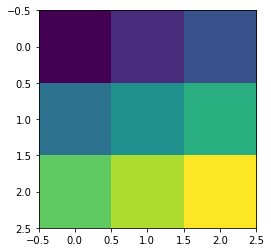

In [21]:
plt.imshow(image.numpy().reshape(3,3)) #matplotlib은 2차원까지밖에 못 찍어서 reshape해야 찍을 수 있다

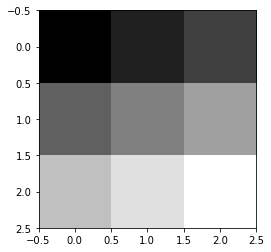

In [23]:
plt.imshow(image.numpy().reshape(3,3), cmap='gray') #실제 pixel을 시각화 한게 아니라 데이터를 시각화 한 것임

image.shpe (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
tf.Tensor(
[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]], shape=(1, 3, 3, 1), dtype=float32)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


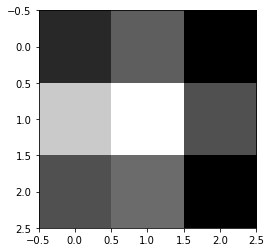

In [23]:
print("image.shpe", image.shape)
weight = np.array([[[[1.]],[[1.]]],[[[1.]],[[1.]]]]) #filter라 보면 될듯
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight) #초기화
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')

image.shpe (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


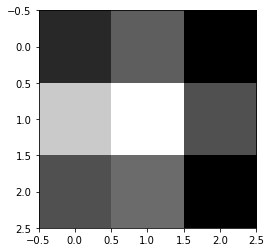

In [25]:
print("image.shpe", image.shape)
weight = np.array([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
# 이 아래 두 줄이 high level 코드
weight_init = tf.constant_initializer(weight)
# conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
#윗 줄을 low level로 구현(아래)
conv2d = tf.nn.conv2d(image, weight, strides=1, padding='SAME')
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')

image.shpe (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


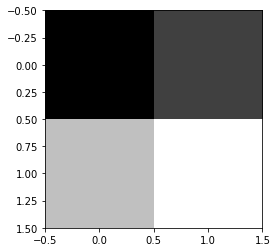

In [30]:
print("image.shpe", image.shape)
weight = np.array([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
# conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='valid', kernel_initializer=weight_init)(image)
conv2d = tf.nn.conv2d(image, weight, strides=1, padding='VALID')
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')

conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


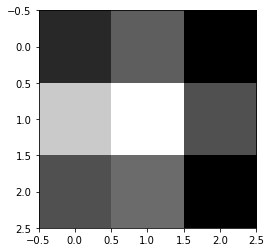

In [31]:
# conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
conv2d = tf.nn.conv2d(image, weight, strides=1, padding='SAME')
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

### 중요!

image.shpe (1, 3, 3, 1)
weight.shpe (2, 2, 1, 3)
[[1. 1.]
 [1. 1.]]
[[10. 10.]
 [10. 10.]]
[[-1. -1.]
 [-1. -1.]]
conv2d.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


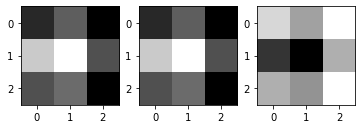

In [37]:
print("image.shpe", image.shape)
# weight의 형상이 좀 다르네? weight의 filter가 3개 마지막 인자가 FN filter number
weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],[[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shpe", weight.shape)

#weight의 각 filter를 아래와 같이 모아서 찍어 보는 연습
for a in np.transpose(weight,(3,0,1,2)):
    print(a.reshape(2,2))

weight_init = tf.constant_initializer(weight)
# conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
conv2d = tf.nn.conv2d(image, weight, strides=1, padding='SAME')
print("conv2d.shape", conv2d.shape)

# 3번째 index FN을 맨 앞으로, 0번째 index를 맨 뒤로 축 교환 하여 모아서 찍어 줌
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

### 채널이 3개, 필터가 3개인 경우의 연산 구현 (추가)

In [49]:
import tensorflow as tf
import numpy as np
import tensorflow.keras
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
image = tf.constant([[[[1,0,1], [1,1,1], [1,1,1], [0,0,1], [0,1,0]],
                    [[0,0,1], [1,1,1], [1,1,1], [1,1,1], [0,0,0]],
                    [[0,0,0], [0,0,0], [1,1,0], [1,1,1], [1,0,1]],
                    [[0,0,0], [0,0,1], [1,1,1], [1,1,1], [0,1,0]],
                    [[0,1,0], [1,1,1], [1,1,1], [0,0,0], [0,0,0]]]], dtype=np.float32)

weight = np.array([[[[1,1], [0,1], [-1,-1]], [[0,0], [-1,0], [0,0]], [[1,1], [0,1], [0,0]]],
                    [[[0,0], [-1,0], [0,0]], [[1,1], [1,1], [1,1]], [[0,0], [-1,0], [0,0]]],
                    [[[1,1], [1,1], [0,0]], [[0,0], [-1,0], [0,0]], [[1,1], [0,1], [-1,-1]]]])
print(image.shape)
print(weight.shape)
# print(type(image))
# print(image)

conv2d = tf.nn.conv2d(image, weight, strides=1, padding='VALID')
print("conv2d.shape", conv2d.shape)

for a in np.transpose(conv2d.numpy(),(3,0,1,2)):
    print(a.reshape(3,3))

(1, 5, 5, 3)
(3, 3, 3, 2)
conv2d.shape (1, 3, 3, 2)
[[ 3. -1.  3.]
 [-2.  0.  2.]
 [ 1.  3.  4.]]
[[7. 5. 7.]
 [2. 6. 7.]
 [5. 7. 8.]]


### 맥스 풀링 및 렐루

In [53]:
image = tf.constant([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
print(image.shape)
# pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='valid')(image)
pool = tf.nn.max_pool2d(image, ksize=2, strides=2, padding='VALID') #max pooling 제일 큰 값만 뽑음
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
(1, 1, 1, 1)
[[[[4.]]]]


In [84]:
image = tf.constant([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
# pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='same')(image)
pool = tf.nn.max_pool2d(image, ksize=2, strides=2, padding='SAME')
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


(28, 28)


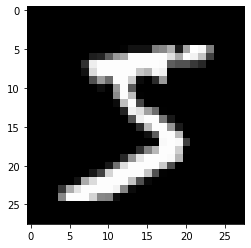

In [55]:
mnist = tf.keras.datasets.mnist
class_names = ['0','1','2','3','4','5','6','7','8','9']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

img = train_images[0]
print(img.shape)
plt.imshow( img, cmap='gray')
plt.show()

train_images[0] (28, 28)
img <class 'numpy.ndarray'>
img <class 'tensorflow.python.framework.ops.EagerTensor'>
conv2d.shape (1, 28, 28, 5)


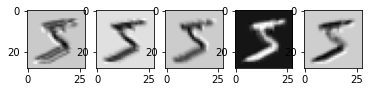

In [58]:
img = train_images[0]
print("train_images[0]",train_images[0].shape)
print("img",type(img))
img = img.reshape(-1,28,28,1) #img.shape = (1,28,28,1)
img = tf.convert_to_tensor(img) #numpy가 tensor로 바뀜
print("img",type(img))

weight_init = tf.keras.initializers.RandomNormal(stddev=0.01)
#print(weight_init) # weight.shape = (3,3,1,5)
conv2d = tf.keras.layers.Conv2D(filters=5, kernel_size=3, padding='same', 
                             strides=(1,1), kernel_initializer=weight_init)(img)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(28,28), cmap='gray')
plt.show()

(1, 14, 14, 5)


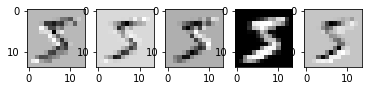

In [60]:
#max pooling으로 최대값 특성만 추출
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same')(conv2d)
print(pool.shape)
feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()

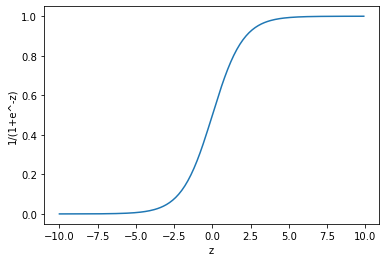

In [61]:
zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

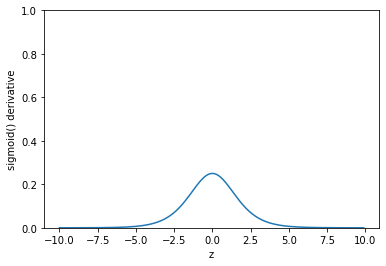

In [62]:
def  sigmoid(x):
    return 1/(1+np.exp(-x))

zs = np.arange(-10., 10., 0.1)
gs = [ sigmoid(z)*(1-sigmoid(z)) for z in zs]
plt.plot(zs, gs)
plt.ylim(0,1)
plt.xlabel('z')
plt.ylabel('sigmoid() derivative')
plt.show()

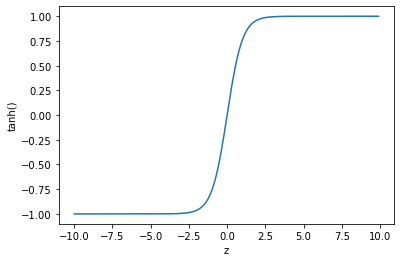

In [39]:
def  sigmoid(x):
    return 1/(1+np.exp(-x))

zs = np.arange(-10., 10., 0.1)
gs = [ np.tanh(z) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('tanh()')
plt.show()

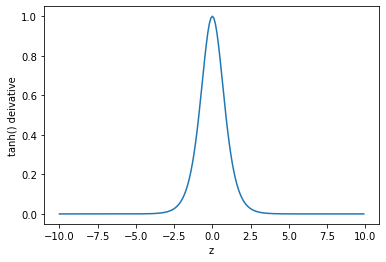

In [40]:
def  sigmoid(x):
    return 1/(1+np.exp(-x))

zs = np.arange(-10., 10., 0.1)
gs = [ (1-np.tanh(z))*(1+np.tanh(z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('tanh() deivative')
plt.show()

In [41]:
def relu(x):
    return np.maximum(x, 0)

In [42]:
x = np.array([-1, 2, -3, 4, -5])
relu(x)

array([0, 2, 0, 4, 0])

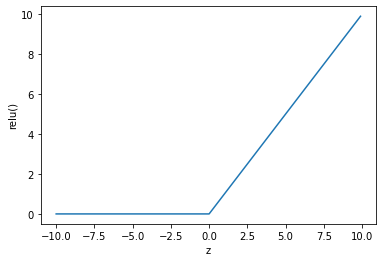

In [43]:
def  sigmoid(x):
    return 1/(1+np.exp(-x))

zs = np.arange(-10., 10., 0.1)
gs = [ relu(z) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('relu()')
plt.show()

In [44]:
r_out = tf.nn.relu(x)
r_out.numpy()

array([0, 2, 0, 4, 0])

### 텐서플로우 로우레벨 구현

In [63]:
import tensorflow as tf

class ConvolutionNetwork:
    
    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        self.n_kernels = n_kernels  # 합성곱의 커널 개수
        self.kernel_size = 3        # 커널 크기
        self.optimizer = None       # 옵티마이저
        self.conv_w = None          # 합성곱 층의 가중치
        self.conv_b = None          # 합성곱 층의 절편
        self.units = units          # 은닉층의 뉴런 개수
        self.batch_size = batch_size  # 배치 크기
        self.w1 = None              # 은닉층의 가중치
        self.b1 = None              # 은닉층의 절편
        self.w2 = None              # 출력층의 가중치
        self.b2 = None              # 출력층의 절편
        self.a1 = None              # 은닉층의 활성화 출력
        self.losses = []            # 훈련 손실
        self.val_losses = []        # 검증 손실
        self.lr = learning_rate     # 학습률

    def forpass(self, x):
#         print("x.shape", x.shape)
        # 3x3 합성곱 연산을 수행합니다.
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        # 렐루 활성화 함수를 적용합니다.
        r_out = tf.nn.relu(c_out)
        # 2x2 최대 풀링을 적용합니다.
        p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
        # 첫 번째 배치 차원을 제외하고 출력을 일렬로 펼칩니다.
        f_out = tf.reshape(p_out, [x.shape[0], -1]) #flatten 배치사이즈 제외한 나머지를 1차원으로 펼침
#         print("f_out.shape", f_out.shape)
        z1 = tf.matmul(f_out, self.w1) + self.b1     # 첫 번째 층의 선형 식을 계산합니다
        a1 = tf.nn.relu(z1)                          # 활성화 함수를 적용합니다
        z2 = tf.matmul(a1, self.w2) + self.b2        # 두 번째 층의 선형 식을 계산합니다.
        return z2
    
    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels))) #n_kernels 필터의 수
#         print("conv_w",self.conv_w)
#         print("conv_w.shape",self.conv_w.shape)
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
#         print("conv_b",self.conv_b)
#         print("conv_b.shape",self.conv_b.shape)
        n_features = 14 * 14 * self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))          # (특성 개수, 은닉층의 크기)
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    # 은닉층의 크기
        self.w2 = tf.Variable(g((self.units, n_classes)))           # (은닉층의 크기, 클래스 개수)
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)     # 클래스 개수
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                self.training(x_batch, y_batch)
                # 배치 손실을 기록합니다.
                batch_losses.append(self.get_loss(x_batch, y_batch))
            print()
            # 배치 손실 평균내어 훈련 손실 값으로 저장합니다.
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.val_losses.append(self.get_loss(x_val, y_val))

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        bins = len(x) // self.batch_size                   # 미니배치 횟수
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                    # 샘플 개수를 저장합니다.
        with tf.GradientTape() as tape:
            z = self.forpass(x)       # 정방향 계산을 수행합니다.
            # 손실을 계산합니다.
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
            loss = tf.reduce_mean(loss)

        weights_list = [self.conv_w, self.conv_b,
                        self.w1, self.b1, self.w2, self.b2]
        # 가중치에 대한 그래디언트를 계산합니다.
        grads = tape.gradient(loss, weights_list)
        # 가중치를 업데이트합니다.
        self.optimizer.apply_gradients(zip(grads, weights_list))
   
    def predict(self, x):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        return np.argmax(z.numpy(), axis=1) # 가장 큰 값의 인덱스를 반환합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def get_loss(self, x, y):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        # 손실을 계산하여 저장합니다.
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

In [64]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

In [66]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [67]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [68]:
x_train.shape

(48000, 28, 28, 1)

In [69]:
x_train = x_train / 255
x_val = x_val / 255

In [70]:
cn = ConvolutionNetwork(n_kernels=10, units=100, batch_size=128, learning_rate=0.01)
cn.fit(x_train, y_train_encoded, 
       x_val=x_val, y_val=y_val_encoded, epochs=10)

에포크 0 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 2 ......................................................................................................................................................................................................................................

In [71]:
import matplotlib.pyplot as plt

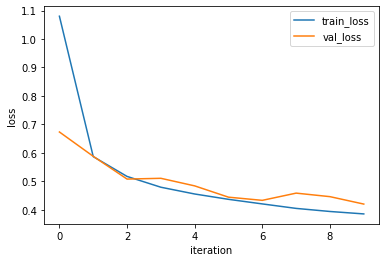

In [72]:
plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [73]:
cn.score(x_val, y_val_encoded)

0.8541666666666666

### 케라스를 이용한 구현

In [74]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [75]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv1.add(MaxPooling2D((2, 2)))
conv1.add(Flatten())
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

In [76]:
conv1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               196100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


In [77]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [78]:
history = conv1.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.5886 - accuracy: 0.7957 - val_loss: 0.3240 - val_accuracy: 0.8854
Epoch 2/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.3189 - accuracy: 0.8847 - val_loss: 0.2855 - val_accuracy: 0.8964
Epoch 3/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2628 - accuracy: 0.9057 - val_loss: 0.2753 - val_accuracy: 0.9021
Epoch 4/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2324 - accuracy: 0.9127 - val_loss: 0.2827 - val_accuracy: 0.8958
Epoch 5/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2065 - accuracy: 0.9237 - val_loss: 0.2538 - val_accuracy: 0.9102
Epoch 6/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1815 - accuracy: 0.9332 - val_loss: 0.2767 - val_accuracy: 0.9006
Epoch 7/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1615 - accuracy: 0.9396 - val_loss: 0.2537 -

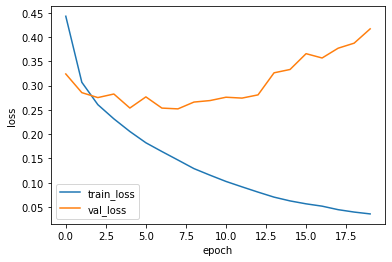

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

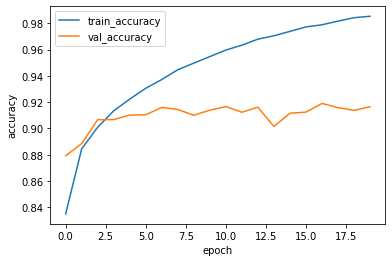

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [80]:
from tensorflow.keras.layers import Dropout

conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

In [81]:
conv2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1960)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               196100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

In [82]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
history = conv2.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.6692 - accuracy: 0.7592 - val_loss: 0.3505 - val_accuracy: 0.8764
Epoch 2/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3815 - accuracy: 0.8601 - val_loss: 0.3037 - val_accuracy: 0.8903
Epoch 3/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.3372 - accuracy: 0.8768 - val_loss: 0.2872 - val_accuracy: 0.8972
Epoch 4/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3103 - accuracy: 0.8855 - val_loss: 0.2902 - val_accuracy: 0.8942
Epoch 5/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2924 - accuracy: 0.8919 - val_loss: 0.2751 - val_accuracy: 0.9013
Epoch 6/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2715 - accuracy: 0.8981 - val_loss: 0.2494 - val_accuracy: 0.9103
Epoch 7/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2496 - accuracy: 0.9061 - val_loss: 0.2501 -

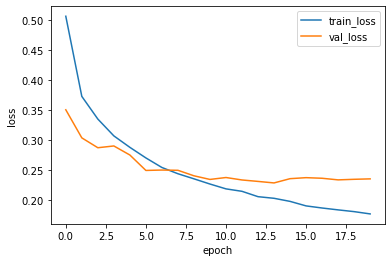

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

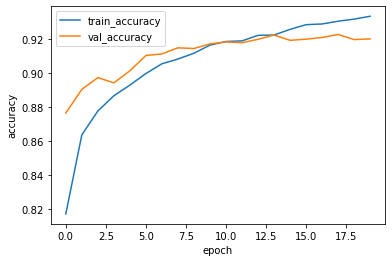

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()